In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

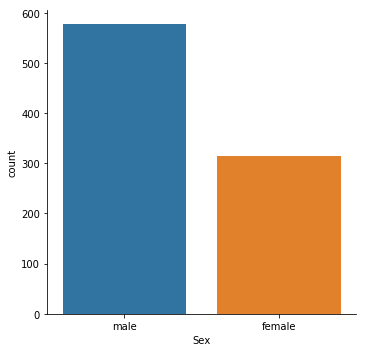

In [13]:
sns.catplot('Sex',data=titanic_df,kind='count')

In [16]:
#this was the number of males to females, twice as many males were present compared to the females

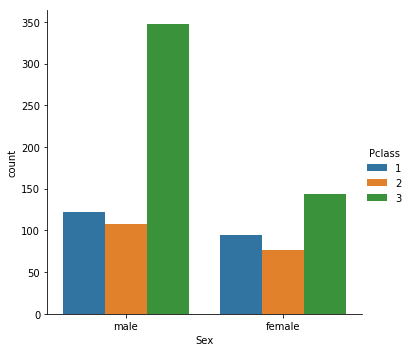

In [15]:
sns.catplot('Sex',data=titanic_df,kind='count',hue='Pclass')

In [17]:
#checking which classes the sex belonged to. classes range from (1,2,3)

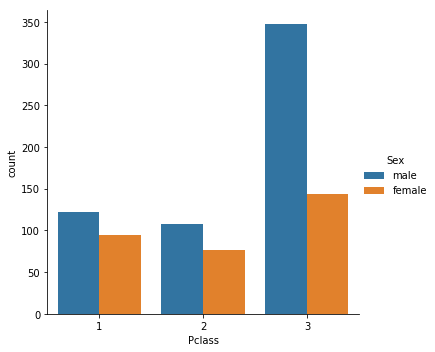

In [18]:
sns.catplot('Pclass',data=titanic_df,kind='count',hue='Sex')

In [19]:
#better way to show the allocation for the classes in the ship

In [20]:
def male_female_child(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex

In [21]:
#above is a function to classify the children from males and females from the population to handle the phrase in the later stages "ladies and children first", so it's important to check for children

In [26]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [27]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [28]:
# a column has been added to classify as 'male', 'female' and 'child'. The 'NaN' ages will be handled later

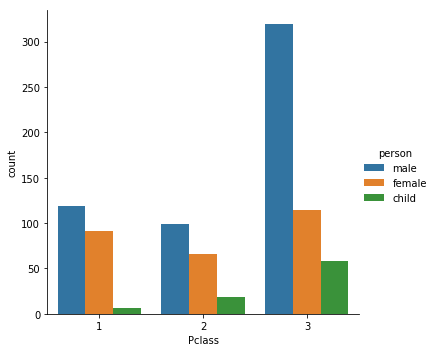

In [29]:
sns.catplot('Pclass',data=titanic_df,kind='count',hue='person')

In [30]:
#now we can also see the number of children in each class

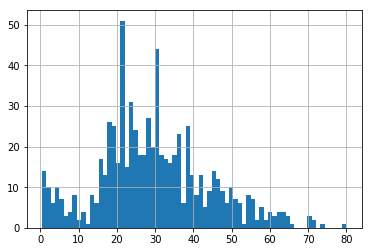

In [31]:
titanic_df['Age'].hist(bins=70)

In [32]:
#above is the age distribution of people on the titanic

In [33]:
titanic_df['Age'].mean()

29.69911764705882

In [34]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

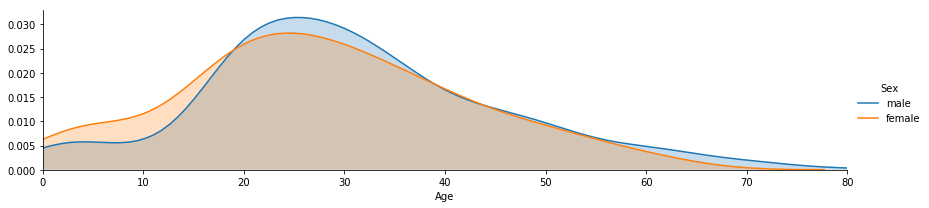

In [36]:
figure=sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
figure.map(sns.kdeplot,'Age',shade=True)

oldest=titanic_df['Age'].max()
figure.set(xlim=(0,oldest))
figure.add_legend()

In [37]:
#map to show multiple kdelplots based off 'Age' factor. Aspect to increase the spread for better visualisation and shade for differentiation
#'oldest' is to show only to the oldest passenger to handle the scaling of plots

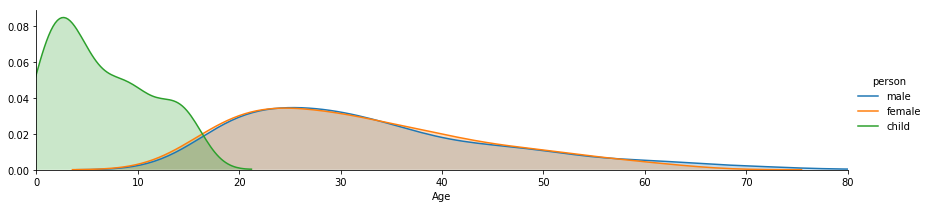

In [38]:
figure=sns.FacetGrid(titanic_df,hue='person',aspect=4)
figure.map(sns.kdeplot,'Age',shade=True)

oldest=titanic_df['Age'].max()
figure.set(xlim=(0,oldest))
figure.add_legend()

In [39]:
#same thing as above but now with children included

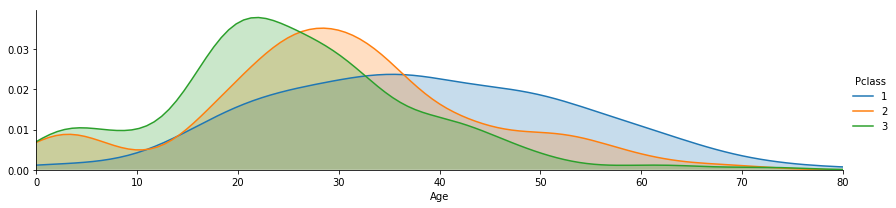

In [40]:
figure=sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
figure.map(sns.kdeplot,'Age',shade=True)

oldest=titanic_df['Age'].max()
figure.set(xlim=(0,oldest))
figure.add_legend()

In [41]:
#This helps to get a pretty clear idea on who the passengers, and we've visualised them over sex, age and class of ticket purchased. 
#You can make inferences on the population using these

In [43]:
#NOW QUESTION 2 "What deck were the passengers on and how does that relate to their class"

In [45]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [46]:
deck=titanic_df['Cabin'].dropna()

In [47]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [48]:
#The cabin data in this dataset begins with a letter, signifying which deck that particular passenger belonged to

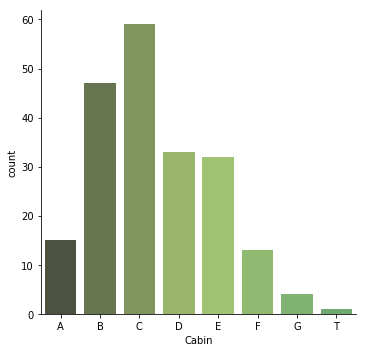

In [88]:
levels=[]
for level in deck:
    levels.append(level[0])
cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']
cabin_df=cabin_df.sort_values('Cabin')
sns.catplot('Cabin',data=cabin_df,kind='count',palette='summer_d')


In [56]:
#The plot has a garbage value 'T' being generated, which is not a part of the cabin. So we filter it out

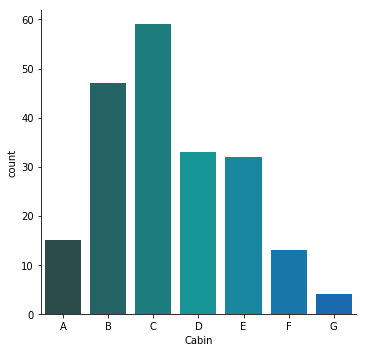

In [87]:
cabin_df=cabin_df[cabin_df.Cabin != 'T']
cabin_df=cabin_df.sort_values('Cabin')
sns.catplot('Cabin',data=cabin_df,kind='count',palette='winter_d')


In [89]:
#This is the count of the number of people in each of the decks (A,B, ...)

In [90]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [91]:
#The 'embarked' column has values (C,Q,S) which are Chorburg, Queenstown and Southhampton respectively

In [92]:
#Question 3) Where did the passengers come from?

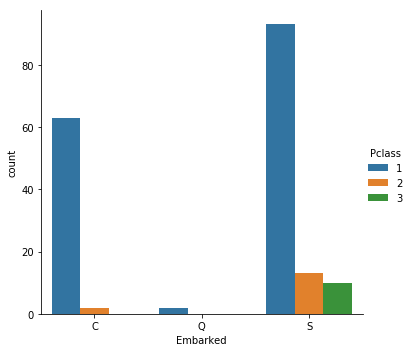

In [132]:
#titanic_df=titanic_df.dropna()
titanic_df=titanic_df

sns.catplot('Embarked',data=titanic_df,hue='Pclass',kind='count',order=['C','Q','S'])

In [107]:
#Question 4) Who was alone and who was with their family?

In [108]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female


In [109]:
#sibsp is the sibling column. 1=had siblings, 0=didn't have siblings
#Parch is the parents column. 1=had parents/children on board, 0=none on board

In [114]:
titanic_df['Family Status']=titanic_df.SibSp + titanic_df.Parch

In [115]:
titanic_df['Family Status']

1      1
3      1
6      0
10     2
11     0
21     0
23     0
27     5
52     1
54     1
62     1
66     0
75     0
88     5
92     1
96     0
97     1
102    1
110    0
118    1
123    0
124    1
136    2
137    1
139    0
148    2
151    1
170    0
174    0
177    0
      ..
737    0
741    1
742    4
745    2
748    1
751    1
759    0
763    3
765    1
772    0
779    1
781    1
782    0
789    0
796    0
802    3
806    0
809    1
820    2
823    1
835    2
853    1
857    0
862    0
867    0
871    2
872    0
879    1
887    0
889    0
Name: Family Status, Length: 183, dtype: int64

In [116]:
titanic_df['Family Status'].loc[titanic_df['Family Status'] >0] = 'With family'
titanic_df['Family Status'].loc[titanic_df['Family Status'] == 0] = 'Alone'

In [117]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Family Status
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,With family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,With family
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,Alone
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With family,With family
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,Alone


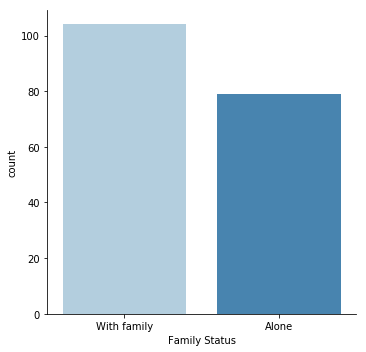

In [118]:
sns.catplot('Family Status',data=titanic_df,kind='count',palette='Blues')

In [129]:
titanic_df['Family Status'].value_counts()

With family    104
Alone           79
Name: Family Status, dtype: int64

In [119]:
#Question 5) What factors do you think helped survive the sinking of titanic?

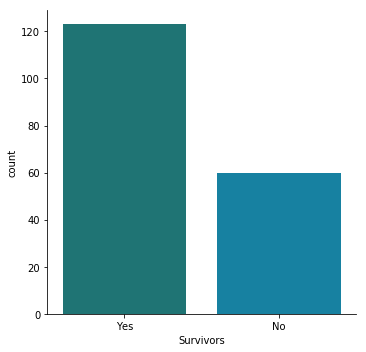

In [131]:
titanic_df['Survivors']=titanic_df.Survived.map({0:'No',1:'Yes'})
sns.catplot('Survivors',data=titanic_df,palette='winter_d',kind='count')


In [134]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Family Status,Survivors
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,With family,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,With family,Yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,Alone,No
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With family,With family,Yes
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,Alone,Yes


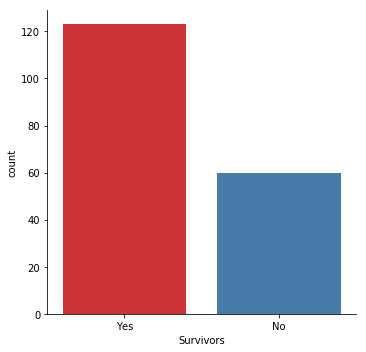

In [136]:
sns.catplot('Survivors',data=titanic_df,palette='Set1',kind='count')

In [137]:
#It was known that class3 did not do as well as the other classes in case of survival

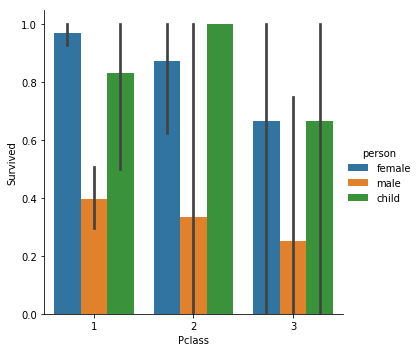

In [141]:
sns.catplot('Pclass','Survived',hue='person',data=titanic_df,kind='bar')

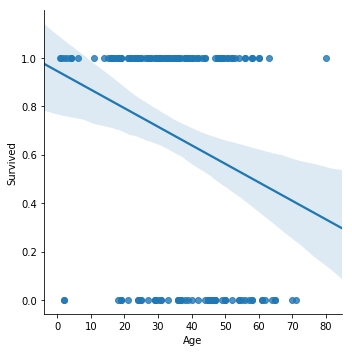

In [142]:
sns.lmplot('Age','Survived',data=titanic_df)

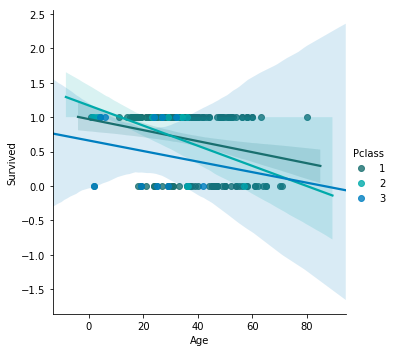

In [145]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter_d')

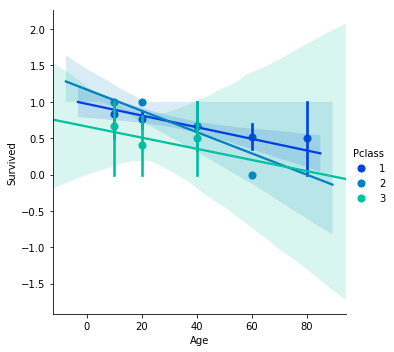

In [146]:
generations= [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

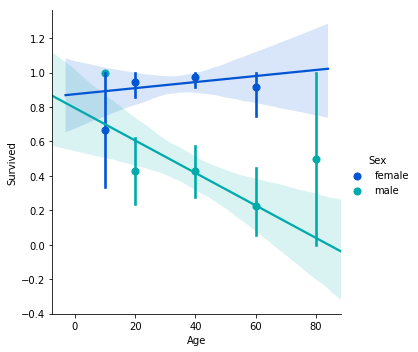

In [147]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [148]:
#Question: Did the deck have an effect on passenger survival deck

In [149]:
#Question: What if you were a male and female for the above question

In [150]:
#Question: Did having family onboard increase the odds of surivng the crash?